# Part A - Sentiment Analysis(Movie Reviews)

**DOMAIN**: Digital content and entertainment industry.

**CONTEXT**: The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

**DATA DESCRIPTION**: The Dataset of **50,000 movie reviews** from **IMDB**, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

**PROJECT OBJECTIVE**: To Build a **sequential NLP classifier** which can use input text parameters to determine the customer sentiments.

## Import the necessary libraries

In [1]:
!pip install gensim --quiet

In [2]:
import numpy as np # mathematical manipulations
import pandas as pd # data manipulations

# for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# splitting into train and test sets
from sklearn.model_selection import train_test_split

# various model performance measures
from sklearn.metrics import confusion_matrix

# for loading pre-trained word embeddings
import gensim.downloader as api

# Neural Network libraries
import tensorflow as tf

# unzipping the data
import zipfile

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# initialize random number generator
import random
# set the seed for consistent results for multiple runs
seed = 7
np.random.seed(seed)

## Importing the data

In [3]:
DESIRED_VOCAB_SIZE = 10000 # vocabulary size

In [4]:
# load IMDB data with 10000 most frequent words
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=DESIRED_VOCAB_SIZE)

## Analyse and pre-process the data

In [5]:
# training movie review shape
x_train.shape

(25000,)

In [6]:
# training customer sentiment shape
y_train.shape

(25000,)

In [7]:
# test movie review shape
x_test.shape

(25000,)

In [8]:
# test customer sentiment shape
y_test.shape

(25000,)

In [9]:
# Retrieve the word index file mapping words to indices
word_index = tf.keras.datasets.imdb.get_word_index()

In [10]:
# words mapped to an index
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [11]:
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())

In [12]:
inverted_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [13]:
def analyse_any_sequence(sequence,label):
  rand_idx = np.random.randint(0,sequence.shape[0])

  # Decode the random sequence in the dataset
  decoded_sequence = " ".join(inverted_word_index[i] for i in sequence[rand_idx])

  print(f'DECODED_SEQUENCE: {decoded_sequence}')
  print()

  print(f'WORD_INDICES: {sequence[rand_idx]}')
  print()

  if(label[rand_idx]==1):
    print(f'POSITIVE SENTIMENT')
  else:
    print(f'NEGATIVE SENTIMENT')

In [14]:
# analyse train sequence
analyse_any_sequence(x_train,y_train)

DECODED_SEQUENCE: the staff his is do too in sex that was between as with i've not them was unfunny that with is burke br of route further br easily gags was best least easily gags friends was with italian was least as you no was with among of complete marrying clunky making into also seconds this man yes his in add of complete stand annoying who of and as it of sure teenage instead always your life they of every my as you comedies is pretend retains br child characters meet celebrity long is and to through in happening maybe of backwards this man stumbled to have one backwards important was start wife as you are on and and who size more it by scenes know that with just easily gags this attended this easily gags all immediate of fun to gays she of names not this as you all gays things of names to immediate of fun like with puts other however for someone with funny gags burke masterpieces and say hats really moments or junk gags more it is quite br diane and something to and level hour 

In [15]:
# analyse train sequence
analyse_any_sequence(x_train,y_train)

DECODED_SEQUENCE: the as it is falls must film of senseless are must but is taking movie ridiculous of mixed britain taylor movie family show of evening plots support jason and and to field steele movie and strongest to and success shows funeral gas he die they allowed keith winning definition for from he and this did won't and is over in upset and and and this an has futuristic insightful to is script quite in of dude largely busy britain taylor book show of try worked 28 movie would and about too in did to afternoon field steele by br of up seasons admit budget br amusing actors it other time very to time tragic movie all recently in at sports spoke and to thousand an they of every my i i of and lynch however and d br circumstances about night movie would there seeming about cannes to failure of succeed come film of iran br about mates hackneyed horrible and awfully and and like hand some his in at about mates film transferred little sebastian and recently in also is playing lot this

In [16]:
# analyse test sequence
analyse_any_sequence(x_test,y_test)

DECODED_SEQUENCE: the was least as on snl this is purchase what's to that with working that end much this embarrassing award for of forget during doing bruce it invented in i i was half of on slow deceased to and to worst gere for as on into one is lack in warner vignettes i'm make brain greater while award capitalize thin filmmaker to disease i i make is working dynamics you i i through can that i i held that i i eventually or that

WORD_INDICES: [1, 13, 219, 14, 20, 4487, 11, 6, 4435, 800, 5, 12, 16, 777, 12, 127, 73, 11, 2265, 1341, 15, 4, 856, 312, 396, 1475, 9, 5158, 8, 10, 10, 13, 317, 4, 20, 547, 5023, 5, 2, 5, 246, 6089, 15, 14, 20, 80, 28, 6, 580, 8, 2988, 7425, 143, 94, 1221, 2795, 134, 1341, 9935, 1520, 1720, 5, 3494, 10, 10, 94, 6, 777, 6888, 22, 10, 10, 140, 67, 12, 10, 10, 1425, 12, 10, 10, 850, 39, 12]

POSITIVE SENTIMENT


In [17]:
# analyse test sequence
analyse_any_sequence(x_test,y_test)

DECODED_SEQUENCE: the if had movies do for audience ladies gun be finale are her plot brilliant many famed and midnight you've excuse won't as by there reason is again chaotic not if episodes out had do by source to various pre blood memorable ted as and normally who arrest seems just discussed dumber and to 70's stupidity

WORD_INDICES: [1, 45, 66, 99, 78, 15, 308, 1911, 1053, 27, 1959, 23, 38, 111, 527, 108, 7647, 2, 2924, 871, 1335, 525, 14, 31, 47, 279, 6, 171, 7611, 21, 45, 669, 43, 66, 78, 31, 2433, 5, 995, 1748, 538, 903, 2898, 14, 2, 1757, 34, 6781, 183, 40, 7061, 6900, 2, 5, 1697, 2999]

NEGATIVE SENTIMENT


In [23]:
def capture_length_of_each_review(arr):
  lengths = np.zeros(arr.shape[0])
  for i in range(0,len(arr)):
    lengths[i] = len(arr[i]) # capturing length of each review
  return lengths

In [37]:
# capture length of training reviews
x_train_lengths = capture_length_of_each_review(x_train)

In [38]:
# capture length of test reviews
x_test_lengths = capture_length_of_each_review(x_test)

In [33]:
def plot_length_distribution(length_arr):
  plt.figure(figsize=(10,10))
  plt.hist(length_arr, bins= 200)
  plt.plot([300, 300], [0, 2500], 'r', linewidth=2.0)
  plt.show()
  print("Average review length: {}".format(np.mean(length_arr)))
  print("Standard deviation: {}".format(round(np.std(length_arr))))
  print("No of reviews with length below 300: {}".format(sum(i < 301 for i in length_arr)))

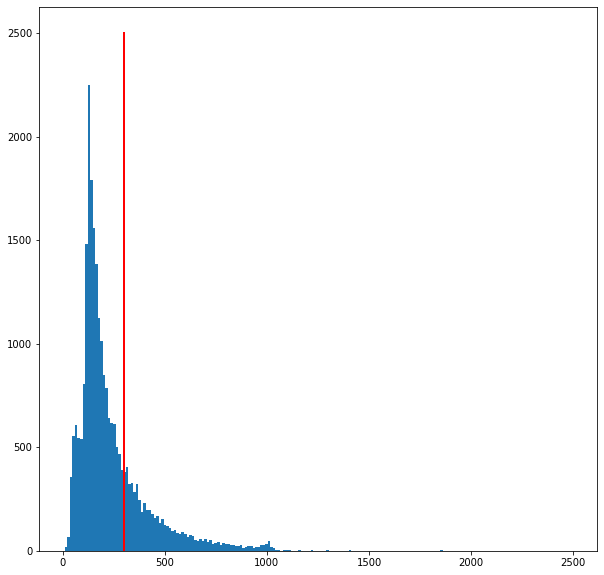

Average review length: 238.71364
Standard deviation: 176
No of reviews with length below 300: 19092


In [40]:
# plot the length distribution of training reviews
plot_length_distribution(x_train_lengths)

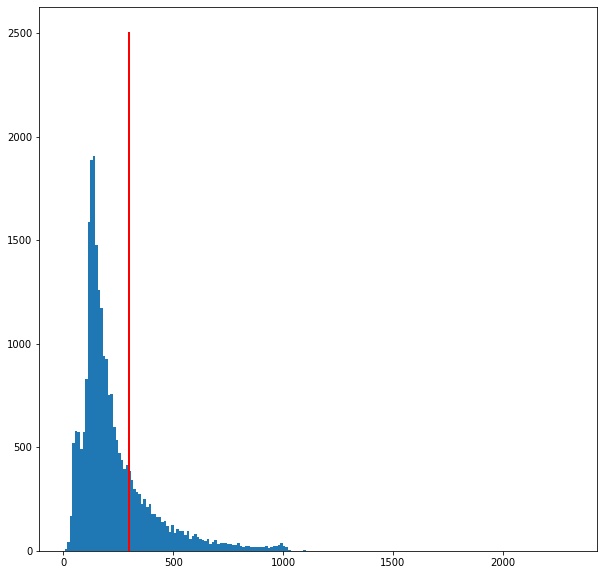

Average review length: 230.8042
Standard deviation: 169
No of reviews with length below 300: 19491


In [41]:
# plot the length distribution of test reviews
plot_length_distribution(x_test_lengths)

In [4]:
# as majority of the sentence length is around 230
# let's select consistent max length of review as 250
MAX_REVIEW_LENGTH = 250

In [44]:
# Pad training and test reviews
# pad on pre side if sentence length is less than max length
# truncate from post side if sentence length is greater than max length
x_train_padded = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=MAX_REVIEW_LENGTH,
                                                        padding='pre', 
                                                        truncating='post')

x_test_padded = tf.keras.preprocessing.sequence.pad_sequences(x_test, 
                                                       maxlen=MAX_REVIEW_LENGTH, 
                                                       padding='pre',
                                                       truncating='post')

In [45]:
x_train_padded.shape

(25000, 250)

In [46]:
x_test_padded.shape

(25000, 250)

In [47]:
x_train_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
         14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458, 4468,
         66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,  838,
        112,   50,  670,    2,    9,   35,  480,  284,    5,  150,    4,
        172,  112,  167,    2,  336,  385,   39,    4,  172, 4536, 1111,
         17,  546,   38,   13,  447,    4,  192,   50,   16,    6,  147,
       2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,   71,
         87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,    4,
         22,   17,  515,   17,   12,   16,  626,   18,    2,    5,   62,
        386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,   16,
        480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,    5,
         25,  124,   51,   36,  135,   48,   25, 14

In [50]:
x_train_padded[600]

array([   1, 1367,    2, 1028,   10,   10,   13,   28,  110,    6,  612,
          7,  542, 2689,  189,  108,  141,   17,    4,    2,    4, 1013,
        119, 7703, 2946,    5, 2816, 3812,  472,   13,  421,  677,  638,
          4,  523,  127,   24,  809,   83,   14, 2385,   39,  380,    8,
       1363,    4,   22,    9, 8547,   19, 2342,  116,    2,   39,    6,
         55,  338,  229,  558,   64,  694,  138,    4,  564,  590,  197,
        414,  141,   17,   57,   92,  140,   46,   50,   92,  140,   46,
         50, 6036,   79,   25,   48,   59,  214,   25, 6036,  516,   25,
          5,   48,   59, 1098,   25,  335,  351,    9,    7,   20,  489,
         10,   10,   14,   22, 3856,   55,  117,  109,  943,    5,    8,
         30, 1202,   13,  426,  459,  329,   44,   51, 1460,    5, 1789,
         16, 9879,  725,   98,   17,   36,   26,   43,    6,  604,    7,
          2, 1170,  539,   37,  123,  220,   57, 1653,    2,   32,   36,
         81,    9, 1415,    5,    2,  469,    4,  4

## Building a **Long Short Term Memory(LSTM)** Model with trainable **Embedding**

In [5]:
EMBEDDING_SIZE = 50
RNN_MEM_SIZE = 128

In [57]:
# Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [58]:
# add trainable embedding layer
model.add(tf.keras.layers.Embedding(input_dim=DESIRED_VOCAB_SIZE + 1, # Vocabulary size
                                    output_dim=EMBEDDING_SIZE, # Embedding size
                                    input_length=MAX_REVIEW_LENGTH) #Number of words in each review
          )

In [59]:
model.output

<KerasTensor: shape=(None, 250, 50) dtype=float32 (created by layer 'embedding')>

In [60]:
# add LSTM with dropout
model.add(tf.keras.layers.LSTM(units=RNN_MEM_SIZE, # RNN State - size of cell state and hidden state
                              dropout=0.2)
          )

In [61]:
model.output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'lstm')>

In [62]:
model.add(tf.keras.layers.Dropout(0.2))

In [64]:
# add dense layer as the output layer
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [65]:
model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>

In [66]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [67]:
# analyse compiled model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 50)           500050    
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 591,827
Trainable params: 591,827
Non-trainable params: 0
_________________________________________________________________


In [69]:
# introduce model callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("sentiment_without_train_embedding.h5", monitor="val_loss", verbose=1, save_best_only=True, mode="min")
]

In [70]:
history = model.fit(x_train_padded, y_train, batch_size=300, epochs=5, validation_split=0.1, verbose=1,callbacks=callbacks)

Epoch 1/5
75/75 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.9568
Epoch 1: val_loss improved from inf to 0.37876, saving model to sentiment_without_train_embedding.h5
75/75 [==============================] - 100s 1s/step - loss: 0.1229 - accuracy: 0.9568 - val_loss: 0.3788 - val_accuracy: 0.8728
Epoch 2/5
75/75 [==============================] - ETA: 0s - loss: 0.1006 - accuracy: 0.9670
Epoch 2: val_loss did not improve from 0.37876
75/75 [==============================] - 98s 1s/step - loss: 0.1006 - accuracy: 0.9670 - val_loss: 0.4662 - val_accuracy: 0.8720
Epoch 3/5
75/75 [==============================] - ETA: 0s - loss: 0.0965 - accuracy: 0.9681
Epoch 3: val_loss did not improve from 0.37876
75/75 [==============================] - 98s 1s/step - loss: 0.0965 - accuracy: 0.9681 - val_loss: 0.4233 - val_accuracy: 0.8688
Epoch 4/5
75/75 [==============================] - ETA: 0s - loss: 0.0771 - accuracy: 0.9739
Epoch 4: val_loss did not improve from 0.3787

### Evaluate the model

In [74]:
# evaluate the model on test data
results = model.evaluate(x_test_padded, y_test)

782/782 [==============================] - 55s 70ms/step - loss: 0.5790 - accuracy: 0.8402


In [77]:
idx = np.argmax(history.history['val_accuracy'])

# loss metrics
train_loss = history.history['loss'][idx]
test_loss = history.history['val_loss'][idx]

# accuracy metrics
train_acc = history.history['accuracy'][idx]
test_acc = history.history['val_accuracy'][idx]

# displaying the evaluated metrics
metrics_df = pd.DataFrame(index=['Loss','Accuracy'],columns=['Training','Validation','Testing'],
                          data=[[train_loss,test_loss,results[0]],[train_acc,test_acc,results[1]]])
metrics_df

,Training,Validation,Testing
Loss,0.122910,0.378756,0.578964
Accuracy,0.956844,0.872800,0.840200


In [81]:
# prediction on test data with Prob > 0.5 = 1
y_pred = (model.predict(x_test_padded) > 0.5).astype("int32").flatten()

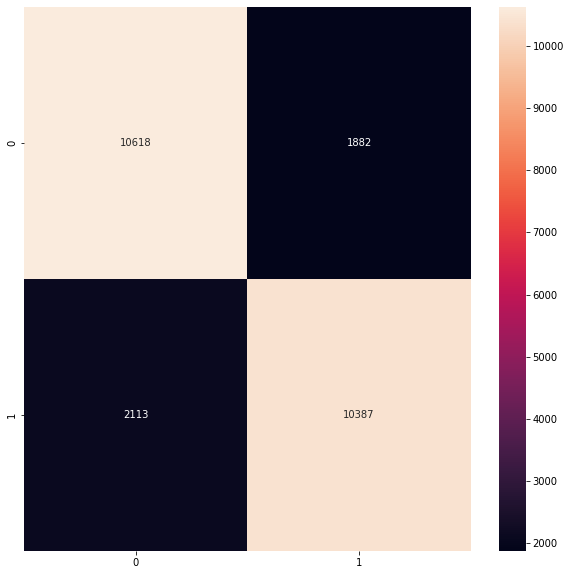

In [83]:
# plot confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=[i for i in range(0,2)]) # getting the confusion matrix

cm_df = pd.DataFrame(cm, index=[i for i in range(0,2)], columns=[i for i in range(0,2)]) # confusion matrix data frame

plt.figure(figsize=(10,10))
sns.heatmap(cm_df,annot=True,fmt='g') # plotting the heatmap
plt.show()

### Prediction on ten random samples

In [90]:
rand_indices = np.random.randint(0,x_test_padded.shape[0],10)
for rand_idx in rand_indices:
  y_pred = (model.predict(x_test_padded[rand_idx].reshape(-1,MAX_REVIEW_LENGTH)) > 0.5).astype("int32").flatten()
  y_actual = y_test[rand_idx]
  print(f'Prediction: {y_pred[0]}, Ground Truth: {y_actual}')

Prediction: 0, Ground Truth: 1
Prediction: 1, Ground Truth: 1
Prediction: 1, Ground Truth: 1
Prediction: 1, Ground Truth: 1
Prediction: 0, Ground Truth: 1
Prediction: 0, Ground Truth: 0
Prediction: 0, Ground Truth: 0
Prediction: 1, Ground Truth: 1
Prediction: 1, Ground Truth: 1
Prediction: 0, Ground Truth: 0


## Building a **Long Short Term Memory(LSTM)** Model with pre-trained **Embedding**

In [95]:
# Load GloVe model (similar to Word2Vec)
glove_model = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [97]:
# Size of the model
glove_model.vectors.shape

(400000, 50)

In [98]:
# Initialize embedding matrix for our dataset with 10000+1 rows (1 for padding word)
# and 50 columns (as embedding size is 50)
embedding_matrix = np.zeros((DESIRED_VOCAB_SIZE + 1, EMBEDDING_SIZE))

In [99]:
for word, i in sorted(word_index.items(),key=lambda x:x[1]):
  if i > (DESIRED_VOCAB_SIZE+1):
    break
  try:
    embedding_vector = glove_model[word] #Reading word's embedding from Glove model for a given word
    embedding_matrix[i] = embedding_vector
  except:
    pass

In [103]:
# Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

# add pre-trained embedding layer
model.add(tf.keras.layers.Embedding(input_dim=DESIRED_VOCAB_SIZE + 1, # Vocabulary size
                                    output_dim=EMBEDDING_SIZE, # Embedding size
                                    weights=[embedding_matrix], # pre-trained weights
                                    trainable=True,
                                    input_length=MAX_REVIEW_LENGTH) #Number of words in each review
          )

# add LSTM with dropout
model.add(tf.keras.layers.LSTM(units=RNN_MEM_SIZE, # RNN State - size of cell state and hidden state
                              dropout=0.2)
          )

model.add(tf.keras.layers.Dropout(0.2))

# add dense layer as the output layer
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# analyse compiled model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 50)           500050    
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 591,827
Trainable params: 591,827
Non-trainable params: 0
_________________________________________________________________


In [104]:
# introduce model callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("sentiment_with_trained_embedding.h5", monitor="val_loss", verbose=1, save_best_only=True, mode="min")
]

In [105]:
# model training
history = model.fit(x_train_padded, y_train, batch_size=300, epochs=10, validation_split=0.1, verbose=1,callbacks=callbacks)

Epoch 1/10
75/75 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.5267
Epoch 1: val_loss improved from inf to 0.68590, saving model to sentiment_with_trained_embedding.h5
75/75 [==============================] - 100s 1s/step - loss: 0.6916 - accuracy: 0.5267 - val_loss: 0.6859 - val_accuracy: 0.5408
Epoch 2/10
75/75 [==============================] - ETA: 0s - loss: 0.6223 - accuracy: 0.6527
Epoch 2: val_loss improved from 0.68590 to 0.58297, saving model to sentiment_with_trained_embedding.h5
75/75 [==============================] - 100s 1s/step - loss: 0.6223 - accuracy: 0.6527 - val_loss: 0.5830 - val_accuracy: 0.6912
Epoch 3/10
75/75 [==============================] - ETA: 0s - loss: 0.5143 - accuracy: 0.7561
Epoch 3: val_loss improved from 0.58297 to 0.47319, saving model to sentiment_with_trained_embedding.h5
75/75 [==============================] - 103s 1s/step - loss: 0.5143 - accuracy: 0.7561 - val_loss: 0.4732 - val_accuracy: 0.7780
Epoch 4/10
75/75 [==

### Evaluate the model

In [106]:
# evaluate the model on test data
results = model.evaluate(x_test_padded, y_test)

idx = np.argmax(history.history['val_accuracy'])

# loss metrics
train_loss = history.history['loss'][idx]
test_loss = history.history['val_loss'][idx]

# accuracy metrics
train_acc = history.history['accuracy'][idx]
test_acc = history.history['val_accuracy'][idx]

# displaying the evaluated metrics
metrics_df = pd.DataFrame(index=['Loss','Accuracy'],columns=['Training','Validation','Testing'],
                          data=[[train_loss,test_loss,results[0]],[train_acc,test_acc,results[1]]])
metrics_df

782/782 [==============================] - 53s 67ms/step - loss: 0.3485 - accuracy: 0.8610


,Training,Validation,Testing
Loss,0.241889,0.348627,0.348497
Accuracy,0.904667,0.877600,0.860960


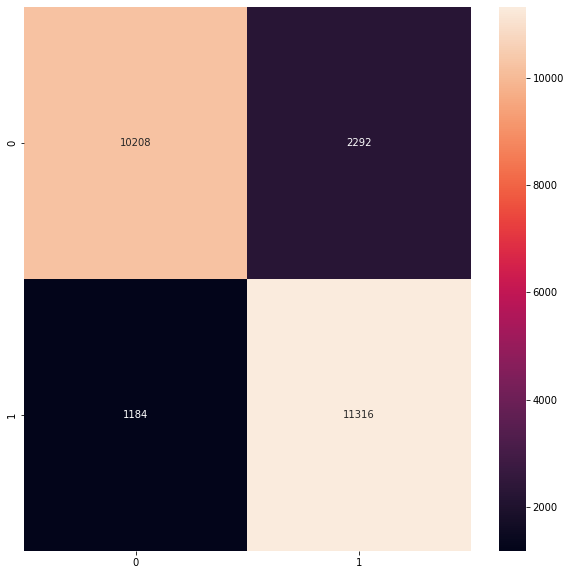

In [107]:
# prediction on test data with Prob > 0.5 = 1
y_pred = (model.predict(x_test_padded) > 0.5).astype("int32").flatten()

# plot confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=[i for i in range(0,2)]) # getting the confusion matrix

cm_df = pd.DataFrame(cm, index=[i for i in range(0,2)], columns=[i for i in range(0,2)]) # confusion matrix data frame

plt.figure(figsize=(10,10))
sns.heatmap(cm_df,annot=True,fmt='g') # plotting the heatmap
plt.show()

### Prediction on ten random samples

In [108]:
rand_indices = np.random.randint(0,x_test_padded.shape[0],10)
for rand_idx in rand_indices:
  y_pred = (model.predict(x_test_padded[rand_idx].reshape(-1,MAX_REVIEW_LENGTH)) > 0.5).astype("int32").flatten()
  y_actual = y_test[rand_idx]
  print(f'Prediction: {y_pred[0]}, Ground Truth: {y_actual}')

Prediction: 0, Ground Truth: 0
Prediction: 1, Ground Truth: 0
Prediction: 1, Ground Truth: 1
Prediction: 1, Ground Truth: 1
Prediction: 1, Ground Truth: 1
Prediction: 1, Ground Truth: 1
Prediction: 1, Ground Truth: 1
Prediction: 0, Ground Truth: 1
Prediction: 0, Ground Truth: 0
Prediction: 0, Ground Truth: 0


# Part B - Sarcasm Detection(News Data)
**DOMAIN**: Social media analytics

**CONTEXT**: Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

**DATA DESCRIPTION**: The dataset is collected from two news websites, [theonion.com](https://www.theonion.com/) and [huffingtonpost.com](https://www.huffpost.com/). This new dataset has the following advantages over the existing Twitter datasets:

- Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings. 
- Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.
- Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements.

**Content**: Each record consists of three attributes:
- `is_sarcastic`: 1 if the record is sarcastic otherwise 0
- `headline`: the headline of the news article
- `article_link`: link to the original news article. Useful in collecting supplementary data.

**PROJECT OBJECTIVE**: Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

## Import data

In [6]:
!cp '/content/drive/MyDrive/Colab Notebooks/Sarcasm_Headlines_Dataset.json' .

In [7]:
!ls -l

total 5924
drwx------ 5 root root    4096 Aug  6 12:38 drive
drwxr-xr-x 1 root root    4096 Aug  3 20:21 sample_data
-rw------- 1 root root 6057044 Aug  6 12:39 Sarcasm_Headlines_Dataset.json


In [18]:
# read news data into dataframe
sarcasm_headlines_df = pd.read_json('/content/Sarcasm_Headlines_Dataset.json',lines=True)

## Analyse and pre-process data

In [11]:
# verify data import
sarcasm_headlines_df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [12]:
# analyse shape of data
sarcasm_headlines_df.shape

(28619, 3)

In [13]:
# check for null
sarcasm_headlines_df.isnull().any()

is_sarcastic    False
headline        False
article_link    False
dtype: bool

In [15]:
# check information of dataframe
sarcasm_headlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


Values for is_sarcastic
0    14985
1    13634
Name: is_sarcastic, dtype: int64



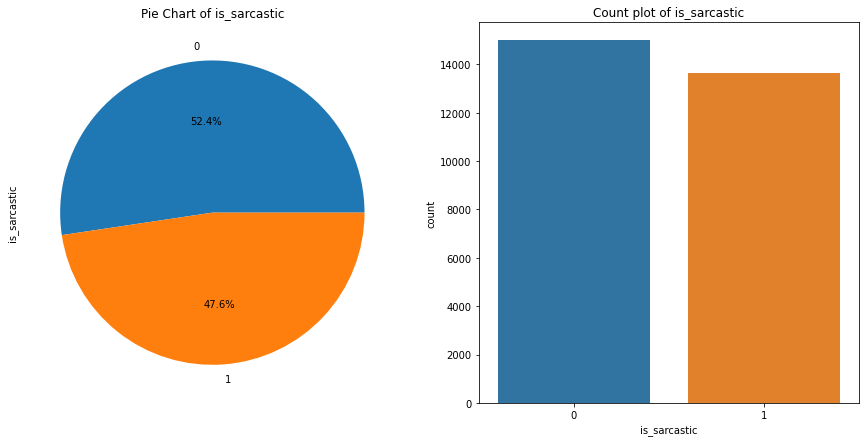

In [16]:
# visualising the target/label balance
print('Values for is_sarcastic')
print(sarcasm_headlines_df['is_sarcastic'].value_counts())
print()

# initialising subplots
figure, ax = plt.subplots(nrows=1, ncols=2)

# setting figure parameters
figure.set_figheight(7)
figure.set_figwidth(15)

#setting axes titles
ax[0].set_title('Pie Chart of is_sarcastic')
ax[1].set_title('Count plot of is_sarcastic')

# plotting the distribution
sarcasm_headlines_df['is_sarcastic'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%')
sns.countplot(x='is_sarcastic',data=sarcasm_headlines_df,ax=ax[1])

plt.show()

In [19]:
# retain only relevant features.
# we can also extract news from the article using web-scrapping by BeautifulSoup and
# get more insights into the news
sarcasm_headlines_df.drop('article_link',axis=1,inplace=True)

In [21]:
# calculate length of each headline
lengths = np.zeros(sarcasm_headlines_df.shape[0])
lengths = sarcasm_headlines_df['headline'].apply(lambda headline:len(headline))

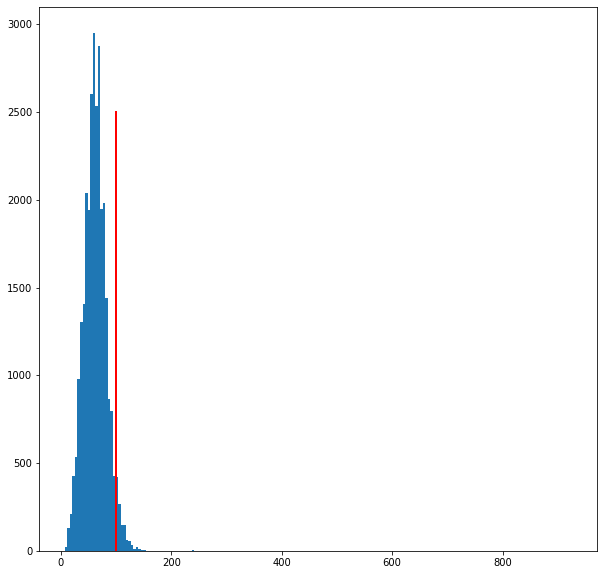

Average review length: 62.30857122890387
Standard deviation: 21
No of reviews with length below 100: 27509


In [36]:
plt.figure(figsize=(10,10))
plt.hist(lengths, bins= 200)
plt.plot([100, 100], [0, 2500], 'r', linewidth=2.0)
plt.show()
print("Average review length: {}".format(np.mean(lengths)))
print("Standard deviation: {}".format(round(np.std(lengths))))
print("No of reviews with length below 100: {}".format(sum(i < 100 for i in lengths)))

In [37]:
# as majority of the sentence length is around 62
# let's select consistent max length of headline as 70
MAX_HEADLINE_LENGTH = 70

### Observations:
- There are **28619 data points**, with **2** independant features and **1** target feature/label.
- No null record is present.
- The dataset is almost balanced between labels with `14985` **normal** and `13634` **sarcastic** news headlines.

## Tokenization and Vectorization
This vectorization would simply convert words into index numbers so that it can be fed to real vectorization using embedding layer

In [54]:
# build a tokenizer for all words
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [55]:
# Fit tokenizer
tokenizer.fit_on_texts(sarcasm_headlines_df['headline'].tolist())

In [56]:
# check {index:word}
tokenizer.index_word

{1: 'to',
 2: 'of',
 3: 'the',
 4: 'in',
 5: 'for',
 6: 'a',
 7: 'on',
 8: 'and',
 9: 'with',
 10: 'is',
 11: 'new',
 12: 'trump',
 13: 'man',
 14: 'at',
 15: 'from',
 16: 'about',
 17: 'by',
 18: 'after',
 19: 'you',
 20: 'this',
 21: 'out',
 22: 'up',
 23: 'be',
 24: 'as',
 25: 'that',
 26: 'it',
 27: 'how',
 28: 'not',
 29: 'he',
 30: 'his',
 31: 'are',
 32: 'your',
 33: 'just',
 34: 'what',
 35: 'all',
 36: 'who',
 37: 'has',
 38: 'will',
 39: 'report',
 40: 'into',
 41: 'more',
 42: 'one',
 43: 'have',
 44: 'year',
 45: 'over',
 46: 'why',
 47: 'day',
 48: 'u',
 49: 'area',
 50: 'woman',
 51: 'can',
 52: 's',
 53: 'says',
 54: 'donald',
 55: 'time',
 56: 'first',
 57: 'like',
 58: 'no',
 59: 'her',
 60: 'get',
 61: 'off',
 62: 'old',
 63: "trump's",
 64: 'life',
 65: 'now',
 66: 'people',
 67: "'",
 68: 'an',
 69: 'house',
 70: 'still',
 71: 'obama',
 72: 'white',
 73: 'back',
 74: 'make',
 75: 'was',
 76: 'than',
 77: 'women',
 78: 'if',
 79: 'down',
 80: 'when',
 81: 'i',
 82: '

In [59]:
# check {word : index}
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'at': 14,
 'from': 15,
 'about': 16,
 'by': 17,
 'after': 18,
 'you': 19,
 'this': 20,
 'out': 21,
 'up': 22,
 'be': 23,
 'as': 24,
 'that': 25,
 'it': 26,
 'how': 27,
 'not': 28,
 'he': 29,
 'his': 30,
 'are': 31,
 'your': 32,
 'just': 33,
 'what': 34,
 'all': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'report': 39,
 'into': 40,
 'more': 41,
 'one': 42,
 'have': 43,
 'year': 44,
 'over': 45,
 'why': 46,
 'day': 47,
 'u': 48,
 'area': 49,
 'woman': 50,
 'can': 51,
 's': 52,
 'says': 53,
 'donald': 54,
 'time': 55,
 'first': 56,
 'like': 57,
 'no': 58,
 'her': 59,
 'get': 60,
 'off': 61,
 'old': 62,
 "trump's": 63,
 'life': 64,
 'now': 65,
 'people': 66,
 "'": 67,
 'an': 68,
 'house': 69,
 'still': 70,
 'obama': 71,
 'white': 72,
 'back': 73,
 'make': 74,
 'was': 75,
 'than': 76,
 'women': 77,
 'if': 78,
 'down': 79,
 'when': 80,
 'i': 81,
 'my':

In [79]:
# set vocab size
VOCABULARY_SIZE = len(tokenizer.index_word)
VOCABULARY_SIZE

30884

In [63]:
# convert text to index
text_to_index = tokenizer.texts_to_sequences(sarcasm_headlines_df['headline'].tolist())

In [67]:
# random observation of sequence
rand_idx = np.random.randint(0,sarcasm_headlines_df.shape[0])
print(sarcasm_headlines_df.iloc[rand_idx]['headline'])
print()
print(text_to_index[rand_idx])

woman assaulted by celebrity just needs to sit tight for 40 years until dozens more women corroborate story

[50, 6598, 17, 1470, 33, 464, 1, 1715, 8789, 5, 701, 104, 412, 1066, 41, 77, 21598, 304]


In [68]:
# Pad headlines
# pad on pre side if sentence length is less than max length
# truncate from post side if sentence length is greater than max length
text_to_index_padded = tf.keras.preprocessing.sequence.pad_sequences(text_to_index,
                                                        maxlen=MAX_HEADLINE_LENGTH,
                                                        padding='pre', 
                                                        truncating='post')

In [75]:
text_to_index_padded.shape

(28619, 70)

In [73]:
# random observation of padded sequence
rand_idx = np.random.randint(0,sarcasm_headlines_df.shape[0])
text_to_index_padded[rand_idx]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,  256,   44,   62,   51,  300,  295, 1802,    2,  216, 9330,
       1336,    4, 1646, 1663], dtype=int32)

In [76]:
# split into train and test in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(text_to_index_padded, sarcasm_headlines_df['is_sarcastic'], test_size=0.2, random_state=seed)

In [77]:
X_train.shape, y_train.shape

((22895, 70), (22895,))

In [78]:
X_test.shape, y_test.shape

((5724, 70), (5724,))

## Setting up Pre-Trained Embeddings

In [85]:
# download GloVe Embedding
!wget http://nlp.stanford.edu/data/glove.6B.zip --quiet

In [86]:
!ls -l

total 847904
drwx------ 5 root root      4096 Aug  6 12:38 drive
-rw-r--r-- 1 root root 862182613 Oct 25  2015 glove.6B.zip
drwxr-xr-x 1 root root      4096 Aug  3 20:21 sample_data
-rw------- 1 root root   6057044 Aug  6 12:39 Sarcasm_Headlines_Dataset.json


In [87]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [88]:
GLOVE_EMBEDDING_PATH = '/content/glove.6B.50d.txt'

In [91]:
def load_glove_model(path):
  print("Loading Glove Model")
  glove_model = {}
  with open(path,'r') as f:
    for line in f:
      split_line = line.split()
      word = split_line[0]
      embedding = np.array(split_line[1:], dtype=np.float64)
      glove_model[word] = embedding
  print(f"{len(glove_model)} words loaded!")
  return glove_model

In [92]:
# load glove model
glove_model = load_glove_model(GLOVE_EMBEDDING_PATH)

Loading Glove Model
400000 words loaded!


In [94]:
# Initialize embedding matrix for our dataset with 30000+1 rows (1 for padding word)
# and 50 columns (as embedding size is 50)
embedding_matrix = np.zeros((VOCABULARY_SIZE + 1, EMBEDDING_SIZE))

In [95]:
embedding_matrix.shape

(30885, 50)

In [96]:
for word, i in sorted(tokenizer.word_index.items(),key=lambda x:x[1]):
  if i > (DESIRED_VOCAB_SIZE+1):
    break
  try:
    embedding_vector = glove_model[word] #Reading word's embedding from Glove model for a given word
    embedding_matrix[i] = embedding_vector
  except:
    pass

## Building a **Bi-Directional Long Short Term Memory(LSTM)** Model with pre-trained **Embedding**.

In [115]:
# Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

# add pre-trained embedding layer
model.add(tf.keras.layers.Embedding(input_dim=VOCABULARY_SIZE + 1, # Vocabulary size
                                    output_dim=EMBEDDING_SIZE, # Embedding size
                                    weights=[embedding_matrix], # pre-trained weights
                                    trainable=True,
                                    input_length=MAX_HEADLINE_LENGTH) #Number of words in each review
          )

# add bidirectional LSTM with dropout
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=RNN_MEM_SIZE, # RNN State - size of cell state and hidden state
                                                             return_sequences=True, # return all hidden states of LSTM
                                                            dropout=0.2)
                                      ,merge_mode='sum') # add all hidden states
          )

HALF_RNN_SIZE = np.int32(RNN_MEM_SIZE/2)
# stack bi-directional LSTM with dropout
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=HALF_RNN_SIZE, # RNN State - size of cell state and hidden state
                                                             return_sequences=True, # return all hidden states of LSTM
                                                            dropout=0.2)
                                      ,merge_mode='concat') # concat all hidden states
          )

QUARTER_RNN_SIZE = np.int32(RNN_MEM_SIZE/4)
# stack bi-directional LSTM with dropout
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=QUARTER_RNN_SIZE, # RNN State - size of cell state and hidden state
                                                            dropout=0.2)
                                      ,merge_mode='mul') # multiply all hidden states
          )

model.add(tf.keras.layers.Dropout(0.2))

# add dense layer as the output layer
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# analyse compiled model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 70, 50)            1544250   
                                                                 
 bidirectional (Bidirectiona  (None, 70, 128)          183296    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 70, 128)          98816     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               41216     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [117]:
# introduce model callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("headline_with_trained_embedding.h5", monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
]

In [121]:
# training the model
history = model.fit(X_train, y_train, batch_size=300, epochs=10, validation_split=0.1, verbose=1,callbacks=callbacks)

Epoch 1/10
69/69 [==============================] - ETA: 0s - loss: 0.6001 - accuracy: 0.6671
Epoch 1: val_accuracy improved from -inf to 0.77598, saving model to headline_with_trained_embedding.h5
69/69 [==============================] - 142s 2s/step - loss: 0.6001 - accuracy: 0.6671 - val_loss: 0.4826 - val_accuracy: 0.7760
Epoch 2/10
69/69 [==============================] - ETA: 0s - loss: 0.4319 - accuracy: 0.8037
Epoch 2: val_accuracy improved from 0.77598 to 0.83668, saving model to headline_with_trained_embedding.h5
69/69 [==============================] - 155s 2s/step - loss: 0.4319 - accuracy: 0.8037 - val_loss: 0.3737 - val_accuracy: 0.8367
Epoch 3/10
69/69 [==============================] - ETA: 0s - loss: 0.3215 - accuracy: 0.8605
Epoch 3: val_accuracy improved from 0.83668 to 0.84978, saving model to headline_with_trained_embedding.h5
69/69 [==============================] - 132s 2s/step - loss: 0.3215 - accuracy: 0.8605 - val_loss: 0.3367 - val_accuracy: 0.8498
Epoch 4/10

### Evaluate the model

In [122]:
# evaluate the model on test data
results = model.evaluate(X_test, y_test)

idx = np.argmax(history.history['val_accuracy'])

# loss metrics
train_loss = history.history['loss'][idx]
test_loss = history.history['val_loss'][idx]

# accuracy metrics
train_acc = history.history['accuracy'][idx]
test_acc = history.history['val_accuracy'][idx]

# displaying the evaluated metrics
metrics_df = pd.DataFrame(index=['Loss','Accuracy'],columns=['Training','Validation','Testing'],
                          data=[[train_loss,test_loss,results[0]],[train_acc,test_acc,results[1]]])
metrics_df

179/179 [==============================] - 13s 72ms/step - loss: 0.3838 - accuracy: 0.8693


,Training,Validation,Testing
Loss,0.107620,0.333674,0.383759
Accuracy,0.959233,0.874672,0.869322


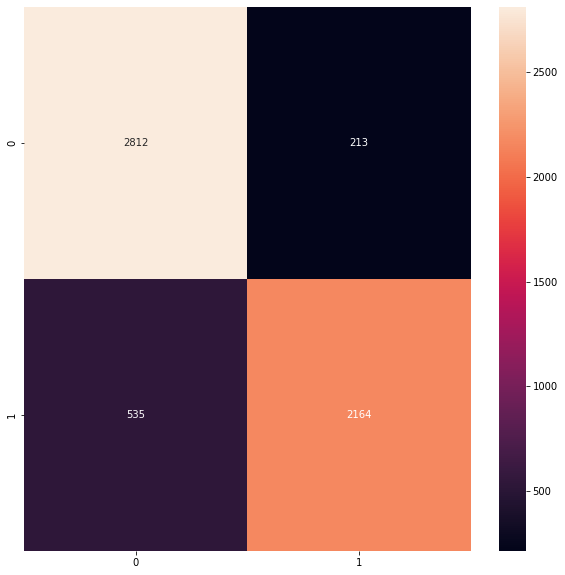

In [123]:
# prediction on test data with Prob > 0.5 = 1
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

# plot confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=[i for i in range(0,2)]) # getting the confusion matrix

cm_df = pd.DataFrame(cm, index=[i for i in range(0,2)], columns=[i for i in range(0,2)]) # confusion matrix data frame

plt.figure(figsize=(10,10))
sns.heatmap(cm_df,annot=True,fmt='g') # plotting the heatmap
plt.show()

### Prediction on ten random samples

In [141]:
rand_indices = np.random.randint(0,X_test.shape[0],10)
for rand_idx in rand_indices:
  y_pred = (model.predict(X_test[rand_idx].reshape(-1,MAX_HEADLINE_LENGTH)) > 0.5).astype("int32").flatten()
  y_actual = y_test[rand_idx]
  print(f'Prediction: {y_pred[0]}, Ground Truth: {y_actual}')

Prediction: 0, Ground Truth: 0
Prediction: 0, Ground Truth: 0
Prediction: 1, Ground Truth: 1
Prediction: 0, Ground Truth: 0
Prediction: 1, Ground Truth: 1
Prediction: 0, Ground Truth: 1
Prediction: 1, Ground Truth: 1
Prediction: 1, Ground Truth: 1
Prediction: 0, Ground Truth: 1
Prediction: 1, Ground Truth: 1


In [142]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/02- SEQUENTIAL_NLP_PROJECT.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/02- SEQUENTIAL_NLP_PROJECT.ipynb to html
[NbConvertApp] Writing 643874 bytes to /content/drive/MyDrive/Colab Notebooks/02- SEQUENTIAL_NLP_PROJECT.html
